In [1]:
# ! pip install --trusted-host pypi.org --trusted-host files.pythonhosted.org --user --upgrade pip
# ! pip install --trusted-host pypi.org --trusted-host files.pythonhosted.org --user tensorflow


In [2]:
### Boston Housing 집값 예측 ( 79 페이지 ~ )

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf



In [3]:
# 데이터셋 불러오기 & 구조 확인

boston = tf.keras.datasets.boston_housing
(x_train, y_train), (x_test, y_test) = boston.load_data()

type(x_train)
type(y_train)

numpy.ndarray

In [4]:
# 데이터 모양 확인

print(x_train.shape) 
print(y_train.shape)
print(x_test.shape)
print(x_test.shape)

(404, 13)
(404,)
(102, 13)
(102, 13)


In [5]:
# 학습데이터 첫번째 데이터 확인

print(x_train[0], y_train[0])

[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ] 15.2


In [6]:
# 네트워크 구조 정의

model =  tf.keras.models.Sequential([
    tf.keras.Input(shape=13),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.Dense(1)
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 3,649
Trainable params: 3,649
Non-trainable params: 0
_________________________________________________________________


In [8]:
# param # 확인 : input*node(Weight)+bias

D0 = 13*64+64
D1 = 64*32+32
D2 = 32*16+16
D3 = 16*8+8
D4 = 8*1+1
print(D0, D1, D2, D3, D4)

896 2080 528 136 9


In [9]:
404 / 32

12.625

In [10]:
# 최적화 함수 지정

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# 모델 컴파일

model.compile(loss="mse", optimizer=optimizer, metrics=['accuracy'])

# 모델 훈련 및 평가

model.fit(x_train, y_train, epochs=1000)  # batch_size default to 32 -> iteration : 404/32 = 12.6(13)

Epoch 1/1000
13/13 [==============================] - 4s 5ms/step - loss: 3371.5674 - accuracy: 0.0000e+00
Epoch 2/1000
13/13 [==============================] - 0s 5ms/step - loss: 463.2708 - accuracy: 0.0000e+00
Epoch 3/1000
13/13 [==============================] - 0s 3ms/step - loss: 167.4343 - accuracy: 0.0000e+00
Epoch 4/1000
13/13 [==============================] - 0s 3ms/step - loss: 87.8680 - accuracy: 0.0000e+00
Epoch 5/1000
13/13 [==============================] - 0s 3ms/step - loss: 74.4140 - accuracy: 0.0000e+00
Epoch 6/1000
13/13 [==============================] - 0s 4ms/step - loss: 66.7970 - accuracy: 0.0000e+00
Epoch 7/1000
13/13 [==============================] - 0s 4ms/step - loss: 65.0423 - accuracy: 0.0000e+00
Epoch 8/1000
13/13 [==============================] - 0s 5ms/step - loss: 63.2999 - accuracy: 0.0000e+00
Epoch 9/1000
13/13 [==============================] - 0s 5ms/step - loss: 62.3298 - accuracy: 0.0000e+00
Epoch 10/1000
13/13 [==============================

In [11]:
model.evaluate(x_train, y_train)

13/13 [==============================] - 0s 2ms/step - loss: 6.0319 - accuracy: 0.0000e+00


[6.0318756103515625, 0.0]

In [12]:
# # [참고] 모델 훈련 결과 history에 저장, callbacks 사용

# history = model.fit(x_train, y_train, epochs=1000, batch_size = 32, validation_split=0.3,
#                     callbacks=[tf.keras.callbacks.EarlyStopping(patience=20, monitor="val_loss")])

# # validation data loss 그래프 그리기

# plt.plot(history.epoch, history.history["val_loss"])

# model.evaluate(x_train, y_train)

13/13 [==============================] - 0s 1ms/step


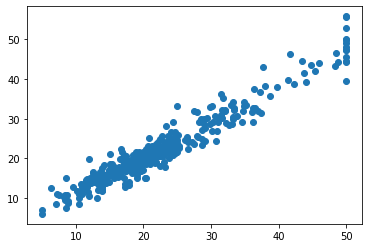

0.9287199835548341

In [13]:
# [참고] 모델 예측 및 성능평가 : 학습용 데이터

pred = model.predict(x_train)
plt.scatter(y_train, pred)
plt.show()


from sklearn.metrics import r2_score

r2_score(y_train, pred)

4/4 [==============================] - 0s 2ms/step


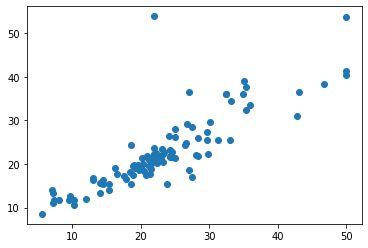

0.7043015890515008

In [14]:
# 모델 예측 및 성능평가 : 평가용 데이터

pred = model.predict(x_test)
plt.scatter(y_test, pred)
plt.show()

r2_score(y_test, pred)

In [15]:
# [참고] 동적차트 그리기
# ! pip install --trusted-host pypi.org --trusted-host files.pythonhosted.org --user plotly

In [16]:

import plotly.express as px

df = pd.concat([pd.DataFrame(y_test, columns=['real']), pd.DataFrame(pred, columns=['pred'])], axis=1)
px.scatter(df, x='real', y='pred')

In [17]:
df[df.real==21.9]

real       pred
65  21.9  21.200933
97  21.9  53.864578

In [18]:
## [참고] 의사결정나무 활용 모델 및 성능평가

from sklearn.tree import DecisionTreeRegressor

tree_uncustomized = DecisionTreeRegressor(random_state=1234)
tr_result = tree_uncustomized.fit(x_train, y_train)
print('학습용 데이터 설명력 : ', tr_result.score(x_train, y_train).round(3), 
      '\n평가용 데이터 설명력 : ', tr_result.score(x_test, y_test).round(3))

from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

estimator = DecisionTreeRegressor()
para_depth = [n_depth*2 for n_depth in range(1, 10)]
para_split = [n_split*3 for n_split in range(1,10)]
para_leaf = [n_leaf*2 for n_leaf in range(1,10)]
param_grid = {"criterion":['mse'], "max_features":['auto', 'sqrt'], 
             "max_depth":para_depth, "min_samples_split":para_split, "min_samples_leaf":para_leaf}

grid_dt = GridSearchCV(estimator, param_grid, scoring='r2', n_jobs=-1)  
grid_dt.fit(x_train, y_train)

print('best_estimator : ',grid_dt.best_estimator_,'\nbest_score : ',grid_dt.best_score_)

tree_final = DecisionTreeRegressor(max_depth=14, min_samples_leaf=2, min_samples_split=3, max_features='auto', random_state=1234)
tr_result = tree_final.fit(x_train, y_train)
print('학습용 데이터 설명력 : ', tr_result.score(x_train, y_train).round(3),
      '\n평가용 데이터 설명력 : ', tr_result.score(x_test, y_test).round(3))

pred = tree_final.predict(x_test)

df = pd.concat([pd.DataFrame(y_test, columns=['real']), pd.DataFrame(pred, columns=['pred'])], axis=1)
px.scatter(df, x='real', y='pred')


학습용 데이터 설명력 :  1.0 
평가용 데이터 설명력 :  0.721
best_estimator :  DecisionTreeRegressor(max_depth=18, max_features='auto', min_samples_leaf=2,
                      min_samples_split=3) 
best_score :  0.7673803344066963
학습용 데이터 설명력 :  0.98 
평가용 데이터 설명력 :  0.788
